# Imports

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

In [276]:
import warnings
warnings.filterwarnings("ignore")

# 1. Correlations in AR models

## AR model

In [277]:
def AutoRegressive(n,c,burnin,noise,params,ylen,init):
    y = [init]*ylen
    for i in range(n):
        y.append(c+sum([params[j]*y[i-j] for j in range(ylen)])+noise[i])
    return y[burnin:]

## Calculations for n = 5000 values of AR(1) model yt = 18 − 0.6yt−1 + ϵt

In [278]:
n = 5000
c = 18
burnin = 200

In [279]:
phi = [-0.6]
noise = np.random.normal(0,1,n+burnin)
autoR_6 = AutoRegressive(n+burnin,c,burnin,noise,phi,len(phi),c)
df_6 = pd.DataFrame(autoR_6)

<AxesSubplot:>

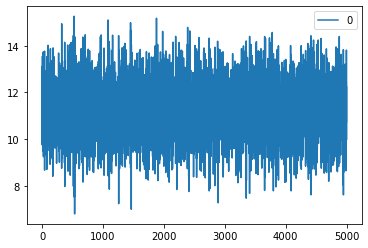

In [280]:
df_6.plot()

## Calculations for n = 5000  ϕ1 = −0.7

In [281]:
phi = [-0.7]
noise = np.random.normal(0,1,n+burnin)
autoR_7 = AutoRegressive(n+burnin,c,burnin,noise,phi,len(phi),c)
df_7 = pd.DataFrame(autoR_7)

<AxesSubplot:>

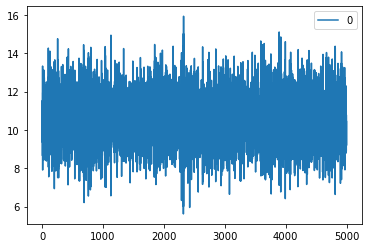

In [282]:
df_7.plot()

## Calculations for n = 5000 ϕ1 = −0.8

In [283]:
phi = [-0.8]
noise = np.random.normal(0,1,n+burnin)
autoR_8 = AutoRegressive(n+burnin,c,burnin,noise,phi,len(phi),c)
df_8 = pd.DataFrame(autoR_8)

<AxesSubplot:>

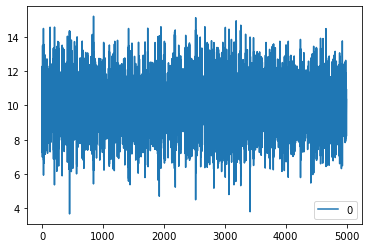

In [284]:
df_8.plot()

## Calculations for n = 5000 ϕ1 = −0.9

In [285]:
phi = [-0.9]
noise = np.random.normal(0,1,n+burnin)
autoR_9 = AutoRegressive(n+burnin,c,burnin,noise,phi,len(phi),c)
df_9 = pd.DataFrame(autoR_9)

<AxesSubplot:>

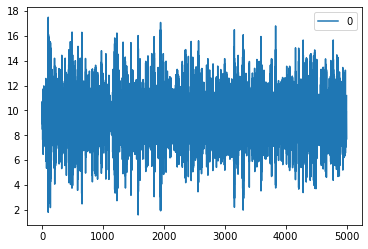

In [286]:
df_9.plot()

## Calculate the autocorrelation (ACF) and partial autocorrelation (PACF) function for this time series

In [287]:
acf_6 = acf(df_6.values)
acf_7 = acf(df_7.values)
acf_8 = acf(df_8.values)
acf_9 = acf(df_9.values)

print(acf_6)
print(acf_7)
print(acf_8)
print(acf_9)

[ 1.00000000e+00 -5.93424619e-01  3.64106450e-01 -2.31685164e-01
  1.40911827e-01 -8.10221349e-02  3.38187702e-02 -1.49341168e-02
  7.44755910e-03  4.83923453e-03  1.21058834e-02 -9.42266420e-03
  3.72234968e-03 -3.25370244e-03 -1.38815235e-02  6.15927693e-03
  5.10878394e-03  7.55007922e-03 -2.50527083e-04 -1.06655257e-02
  2.11060651e-02 -1.34540082e-02  2.20651399e-02 -2.33614124e-02
  2.22024171e-02 -1.09890755e-02  1.70958789e-02 -3.16623823e-02
  3.97711842e-02 -3.01770282e-02  1.65845212e-02  1.88487834e-03
 -8.41024322e-03  7.51902267e-03 -4.46300950e-03  9.49295958e-03
 -2.16915473e-02  1.65292512e-02 -1.14809542e-02  1.19661131e-02
 -2.11834351e-02]
[ 1.         -0.7014424   0.494939   -0.34887698  0.24929696 -0.18487952
  0.13898524 -0.10746428  0.08136673 -0.0598226   0.0432183  -0.03575617
  0.03002351 -0.02559889  0.0160651  -0.02006761  0.0146437  -0.00712352
 -0.00136227 -0.00424477 -0.00952318  0.01811804 -0.01648022  0.01712791
 -0.02277684  0.02310025 -0.02903858  0.

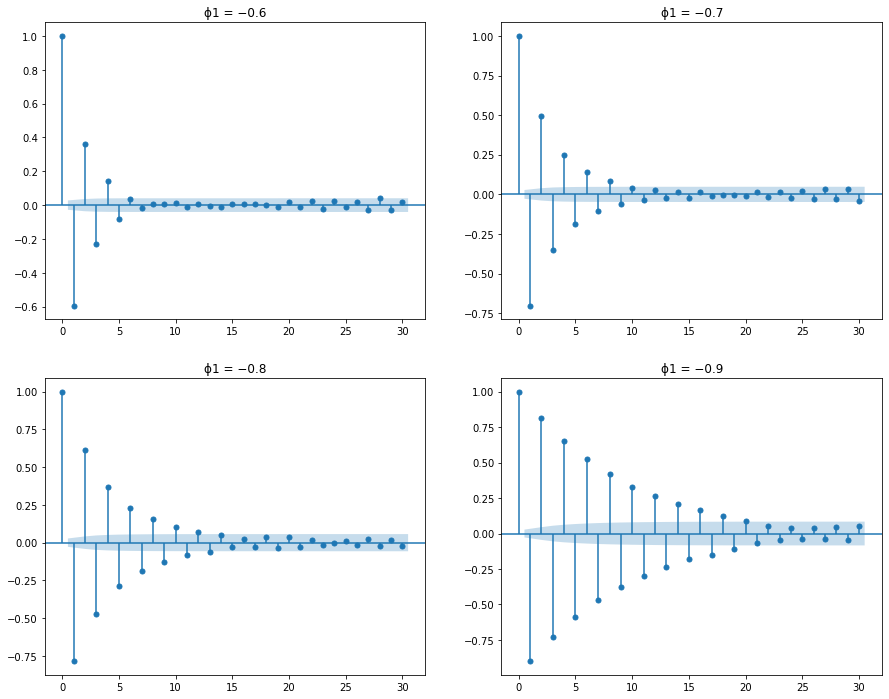

In [288]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
plot_acf(df_6.values.squeeze(),lags=30,ax=ax[0,0],title='ϕ1 = −0.6')
plot_acf(df_7.values.squeeze(),lags=30,ax=ax[0,1],title='ϕ1 = −0.7')
plot_acf(df_8.values.squeeze(),lags=30,ax=ax[1,0],title='ϕ1 = −0.8')
plot_acf(df_9.values.squeeze(),lags=30,ax=ax[1,1],title='ϕ1 = −0.9')
plt.show()

In [289]:
pacf_6 = pacf(df_6.values)
pacf_7 = pacf(df_7.values)
pacf_8 = pacf(df_8.values)
pacf_9 = pacf(df_9.values)

print(pacf_6)
print(pacf_7)
print(pacf_8)
print(pacf_9)

[ 1.00000000e+00 -5.93543304e-01  1.84627914e-02 -1.33717288e-02
 -8.95879231e-03  7.70498104e-03 -2.01454849e-02 -4.87283846e-03
  3.10479219e-03  1.20929180e-02  3.14993439e-02  9.59218786e-03
 -5.36870753e-03 -2.09883307e-03 -2.52367771e-02 -1.66399913e-02
  1.33419815e-02  2.31576346e-02  1.46460221e-02 -1.42564651e-02
  1.18924127e-02  1.23926116e-02  2.15615387e-02 -1.74798262e-04
  5.43067520e-03  1.07098473e-02  1.62625620e-02 -2.54962264e-02
  1.34569857e-02  9.40599383e-03 -9.50299758e-03  1.88495923e-02
 -1.27017790e-03 -5.49401198e-03  3.78277543e-03  1.05835620e-02
 -1.78031000e-02 -8.64650100e-03 -9.38056302e-04  6.17421153e-03
 -1.77182072e-02]
[ 1.00000000e+00 -7.01582692e-01  5.74802017e-03  6.48201675e-04
  6.64646637e-03 -1.34511873e-02  4.55547046e-03 -6.75493278e-03
 -1.92624282e-03  2.92225203e-03 -1.45054286e-03 -8.84829820e-03
  2.00666429e-03 -1.85275164e-03 -1.01225571e-02 -1.99615951e-02
 -1.09354392e-02  7.35922840e-03 -8.41921255e-03 -1.91613522e-02
 -3.226

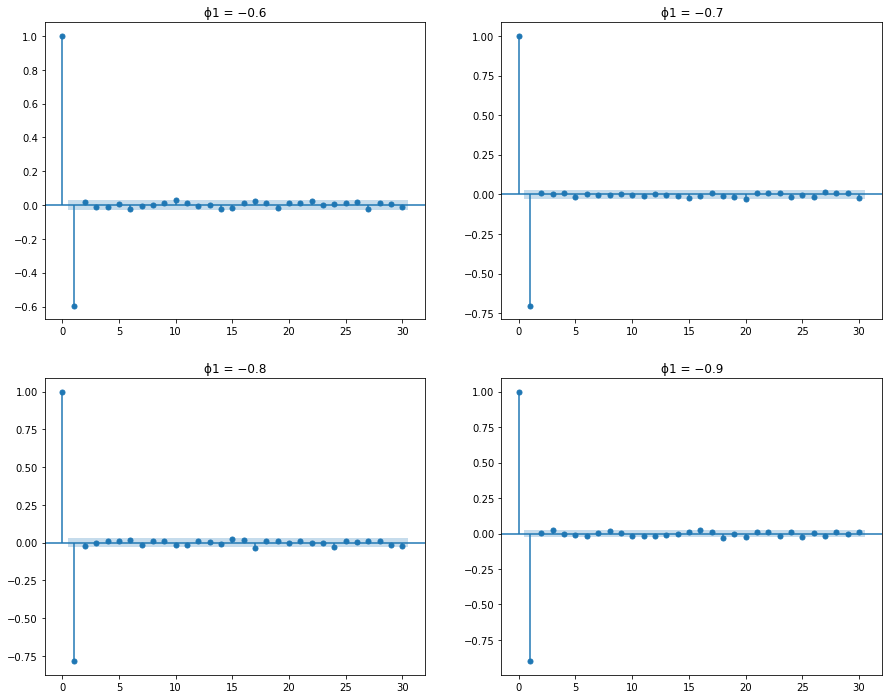

In [290]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
plot_pacf(df_6.values.squeeze(),lags=30,ax=ax[0,0],title='ϕ1 = −0.6')
plot_pacf(df_7.values.squeeze(),lags=30,ax=ax[0,1],title='ϕ1 = −0.7')
plot_pacf(df_8.values.squeeze(),lags=30,ax=ax[1,0],title='ϕ1 = −0.8')
plot_pacf(df_9.values.squeeze(),lags=30,ax=ax[1,1],title='ϕ1 = −0.9')
plt.show()

## Are the generated time series stationary?

### Augmented Dickey-Fuller test

In [291]:
print(f'adfuller for ϕ1 = −0.6:\n{adfuller(df_6)}')
print(f'adfuller for ϕ1 = −0.7:\n{adfuller(df_7)}')
print(f'adfuller for ϕ1 = −0.8:\n{adfuller(df_8)}')
print(f'adfuller for ϕ1 = −0.9:\n{adfuller(df_9)}')

adfuller for ϕ1 = −0.6:
(-140.0319909120451, 0.0, 0, 5000, {'1%': -3.431658532075464, '5%': -2.8621182296803203, '10%': -2.56707779236}, 14041.199637102289)
adfuller for ϕ1 = −0.7:
(-168.77997044996604, 0.0, 0, 5000, {'1%': -3.431658532075464, '5%': -2.8621182296803203, '10%': -2.56707779236}, 14085.507470572127)
adfuller for ϕ1 = −0.8:
(-68.108532410713, 0.0, 1, 4999, {'1%': -3.431658793968827, '5%': -2.862118345383404, '10%': -2.567077853953267}, 14081.326920716714)
adfuller for ϕ1 = −0.9:
(-310.66194300747395, 0.0, 0, 5000, {'1%': -3.431658532075464, '5%': -2.8621182296803203, '10%': -2.56707779236}, 14102.256334761527)


### We can see, that p-value is very low, approximately equal to zero, so we have to reject the null hypothesis.

### Kwiatkowski-Phillips-Schmidt-Shin test

In [292]:
print(f'kpss for ϕ1 = −0.6:\n{kpss(df_6)}')
print(f'kpss for ϕ1 = −0.7:\n{kpss(df_7)}')
print(f'kpss for ϕ1 = −0.8:\n{kpss(df_8)}')
print(f'kpss for ϕ1 = −0.9:\n{kpss(df_9)}')

kpss for ϕ1 = −0.6:
(0.44614466959957655, 0.05726522862087219, 32, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
kpss for ϕ1 = −0.7:
(0.29774986970133893, 0.1, 32, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
kpss for ϕ1 = −0.8:
(0.1018652436668476, 0.1, 32, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
kpss for ϕ1 = −0.9:
(0.20628567148425825, 0.1, 32, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


### p-value is greater than 0.05 so time series are stationary

## What happens when |ϕ1| > 1?

### ϕ1 = −1.1

In [293]:
phi = [-1.1]
noise = np.random.normal(0,1,n+burnin)
autoR_11 = AutoRegressive(n+burnin,c,burnin,noise,phi,len(phi),c)
df_11 = pd.DataFrame(autoR_11)

acf_11 = acf(df_11.values)

pacf_11 = pacf(df_11.values)

Text(0.5, 1.0, 'PACF')

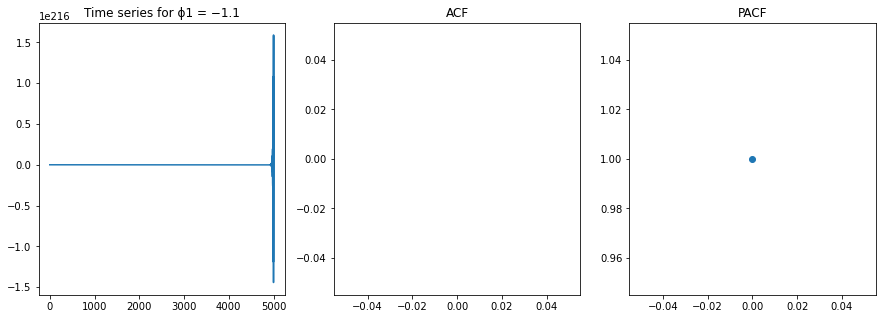

In [294]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(df_11)
ax[0].set_title('Time series for ϕ1 = −1.1')
ax[1].plot(acf_11,marker='o')
ax[1].set_title('ACF')
ax[2].plot(pacf_11,marker='o')
ax[2].set_title('PACF')

## Are they stationary?

### Augmented Dickey-Fuller test

In [295]:
print(f'adfuller for ϕ1 = −1.1:\n{adfuller(df_11)}')

adfuller for ϕ1 = −1.1:
(nan, nan, 0, 5000, {'1%': -3.431658532075464, '5%': -2.8621182296803203, '10%': -2.56707779236}, inf)


### Kwiatkowski-Phillips-Schmidt-Shin test

In [296]:
print(f'kpss for ϕ1 = −1.1:\n{kpss(df_11)}')

kpss for ϕ1 = −1.1:
(nan, nan, 32, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


## Calculate n = 5000 values of AR(2) model yt = 8 + 1.3yt−1 − 0.7yt−2 + ϵt. Compare the structure of PACFs for AR(1) and AR(2) models.

In [313]:
c = 8
phi = [1.3,-0.7]
noise = np.random.normal(0,1,n+burnin)
autoRc8 = AutoRegressive(n+burnin,c,burnin,noise,phi,len(phi),c)
df_c8 = pd.DataFrame(autoRc8)

In [314]:
df_c8.plot()

<AxesSubplot:>

IndexError: index 0 is out of bounds for axis 0 with size 0

### I have no idea why it doesn't work...

##  Comparing the structure of PACFs for AR(1) and AR(2) models

In [319]:
pacf_c8 = pacf(df_c8.values)

print(pacf_c8)

[ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]


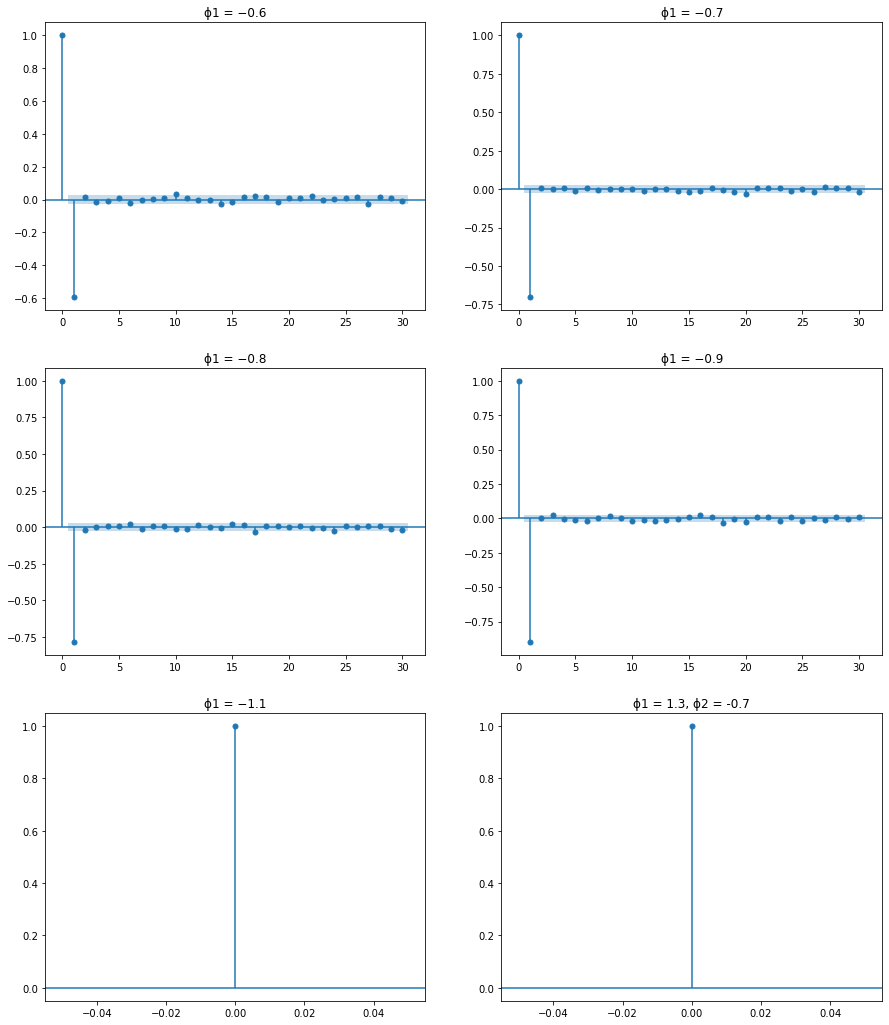

In [320]:
fig, ax = plt.subplots(3,2,figsize=(15,18))
plot_pacf(df_6.values.squeeze(),lags=30,ax=ax[0,0],title='ϕ1 = −0.6')
plot_pacf(df_7.values.squeeze(),lags=30,ax=ax[0,1],title='ϕ1 = −0.7')
plot_pacf(df_8.values.squeeze(),lags=30,ax=ax[1,0],title='ϕ1 = −0.8')
plot_pacf(df_9.values.squeeze(),lags=30,ax=ax[1,1],title='ϕ1 = −0.9')
plot_pacf(df_11.values.squeeze(),lags=30,ax=ax[2,0],title='ϕ1 = −1.1')
plot_pacf(df_c8.values.squeeze(),lags=30,ax=ax[2,1],title='ϕ1 = 1.3, ϕ2 = -0.7')
plt.show()

# 2. AR forecasting

## Preparation of a DataFrame

In [321]:
df=pd.read_csv('RobustaCoffee.csv',parse_dates=True)
df.index.freq='MS'
df

,Month;Price;Change
0,Jul 2002;0.63;
1,Aug 2002;0.61;-3.17%
2,Sep 2002;0.71;16.39%
3,Oct 2002;0.73;2.82%
4,Nov 2002;0.84;15.07%
...,...
230,Sep 2021;2.31;10.00%
231,Oct 2021;2.32;0.43%
232,Nov 2021;2.41;3.88%
233,Dec 2021;2.48;2.90%


In [322]:
df = df['Month;Price;Change'].str.split(';', expand=True)
df

,0,1,2
0,Jul 2002,0.63,
1,Aug 2002,0.61,-3.17%
2,Sep 2002,0.71,16.39%
3,Oct 2002,0.73,2.82%
4,Nov 2002,0.84,15.07%
...,...,...,...
230,Sep 2021,2.31,10.00%
231,Oct 2021,2.32,0.43%
232,Nov 2021,2.41,3.88%
233,Dec 2021,2.48,2.90%


In [323]:
df = df.rename(columns={0:'Month', 1:'Price', 2:'Change'})
df

,Month,Price,Change
0,Jul 2002,0.63,
1,Aug 2002,0.61,-3.17%
2,Sep 2002,0.71,16.39%
3,Oct 2002,0.73,2.82%
4,Nov 2002,0.84,15.07%
...,...,...,...
230,Sep 2021,2.31,10.00%
231,Oct 2021,2.32,0.43%
232,Nov 2021,2.41,3.88%
233,Dec 2021,2.48,2.90%


In [324]:
df = df.set_index('Month')
df

,Price,Change
Month,,
Jul 2002,0.63,
Aug 2002,0.61,-3.17%
Sep 2002,0.71,16.39%
Oct 2002,0.73,2.82%
Nov 2002,0.84,15.07%
...,...,...
Sep 2021,2.31,10.00%
Oct 2021,2.32,0.43%
Nov 2021,2.41,3.88%


## Setting the time index of a dataframe can be tricky (why?).

In [325]:
df.index = pd.to_datetime(df.index)
df

,Price,Change
Month,,
2002-07-01,0.63,
2002-08-01,0.61,-3.17%
2002-09-01,0.71,16.39%
2002-10-01,0.73,2.82%
2002-11-01,0.84,15.07%
...,...,...
2021-09-01,2.31,10.00%
2021-10-01,2.32,0.43%
2021-11-01,2.41,3.88%


### It wasn't very dificoult. Maybe preparing DataFrame was a bit complicated.

## First, using the original time series to forecast twelve months into the future.

<AxesSubplot:xlabel='Month'>

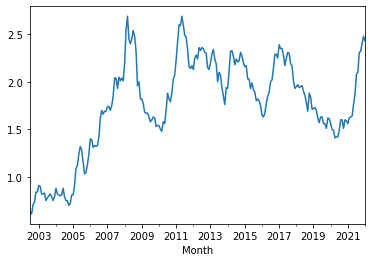

In [326]:
df[['Price']] = df[['Price']].apply(pd.to_numeric)
df['Price'].plot()

In [327]:
split = 0.8
n = int(split*len(df))

In [328]:
train = df.iloc[:n]
test = df.iloc[n:]
start = len(train)
stop = len(df)-1

In [329]:
ARfit = AutoReg(train['Price'],lags=1).fit()

In [330]:
predAR = ARfit.predict(start=start,end=stop,dynamic=False).rename('AR predictions')

In [331]:
predAR

2018-03-01    1.971956
2018-04-01    1.973863
2018-05-01    1.975723
2018-06-01    1.977537
2018-07-01    1.979306
2018-08-01    1.981031
2018-09-01    1.982713
2018-10-01    1.984353
2018-11-01    1.985953
2018-12-01    1.987512
2019-01-01    1.989033
2019-02-01    1.990517
2019-03-01    1.991963
2019-04-01    1.993373
2019-05-01    1.994749
2019-06-01    1.996090
2019-07-01    1.997398
2019-08-01    1.998674
2019-09-01    1.999917
2019-10-01    2.001130
2019-11-01    2.002313
2019-12-01    2.003466
2020-01-01    2.004591
2020-02-01    2.005688
2020-03-01    2.006757
2020-04-01    2.007800
2020-05-01    2.008817
2020-06-01    2.009809
2020-07-01    2.010776
2020-08-01    2.011719
2020-09-01    2.012639
2020-10-01    2.013536
2020-11-01    2.014410
2020-12-01    2.015263
2021-01-01    2.016095
2021-02-01    2.016906
2021-03-01    2.017697
2021-04-01    2.018468
2021-05-01    2.019220
2021-06-01    2.019954
2021-07-01    2.020669
2021-08-01    2.021366
2021-09-01    2.022046
2021-10-01 

In [332]:
ARfit.params

intercept    0.050891
Price.L1     0.975160
dtype: float64

<AxesSubplot:xlabel='Month'>

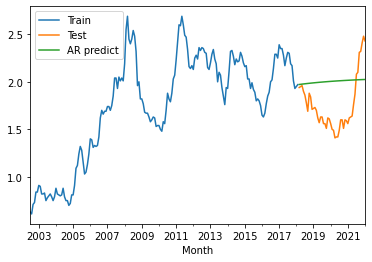

In [333]:
train['Price'].plot(legend=True,label='Train')
test['Price'].plot(legend=True,label='Test')
predAR.plot(legend=True,label='AR predict')

## Let's differencing data

In [334]:
dfdiff = df.copy(deep=True)
dfdiff.drop('Change',inplace=True,axis=1)
dfdiff

,Price
Month,
2002-07-01,0.63
2002-08-01,0.61
2002-09-01,0.71
2002-10-01,0.73
2002-11-01,0.84
...,...
2021-09-01,2.31
2021-10-01,2.32
2021-11-01,2.41


<AxesSubplot:xlabel='Month'>

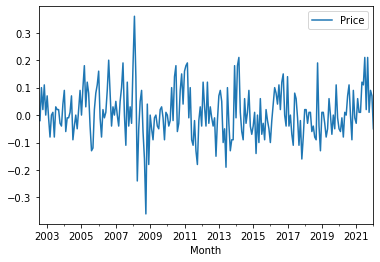

In [335]:
dfdiff['Price'] = dfdiff['Price'].diff()
dfdiff.plot()

In [336]:
traindiff = dfdiff.iloc[:n]
testdiff = dfdiff.iloc[n:]
traindiff.fillna(traindiff['Price'].mean(),inplace=True)
testdiff.fillna(testdiff['Price'].mean(),inplace=True)

In [337]:
ARfitdiff = AutoReg(traindiff['Price'],lags=1).fit()

In [338]:
predARdiff = ARfitdiff.predict(start=start,end=stop,dynamic=False).rename('ARdiff predictions')

In [339]:
predARdiff

2018-03-01    0.010639
2018-04-01    0.008119
2018-05-01    0.007441
2018-06-01    0.007258
2018-07-01    0.007209
2018-08-01    0.007196
2018-09-01    0.007192
2018-10-01    0.007191
2018-11-01    0.007191
2018-12-01    0.007191
2019-01-01    0.007191
2019-02-01    0.007191
2019-03-01    0.007191
2019-04-01    0.007191
2019-05-01    0.007191
2019-06-01    0.007191
2019-07-01    0.007191
2019-08-01    0.007191
2019-09-01    0.007191
2019-10-01    0.007191
2019-11-01    0.007191
2019-12-01    0.007191
2020-01-01    0.007191
2020-02-01    0.007191
2020-03-01    0.007191
2020-04-01    0.007191
2020-05-01    0.007191
2020-06-01    0.007191
2020-07-01    0.007191
2020-08-01    0.007191
2020-09-01    0.007191
2020-10-01    0.007191
2020-11-01    0.007191
2020-12-01    0.007191
2021-01-01    0.007191
2021-02-01    0.007191
2021-03-01    0.007191
2021-04-01    0.007191
2021-05-01    0.007191
2021-06-01    0.007191
2021-07-01    0.007191
2021-08-01    0.007191
2021-09-01    0.007191
2021-10-01 

In [340]:
ARfitdiff.params

intercept    0.005255
Price.L1     0.269198
dtype: float64

<AxesSubplot:xlabel='Month'>

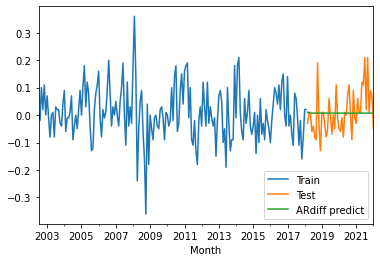

In [341]:
traindiff['Price'].plot(legend=True,label='Train')
testdiff['Price'].plot(legend=True,label='Test')
predARdiff.plot(legend=True,label='ARdiff predict')